<a href="https://colab.research.google.com/github/Hyubbbb/EPOCH_LinearAlgebra/blob/main/Chapter12_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.linalg import null_space

## [Problem 12-1]
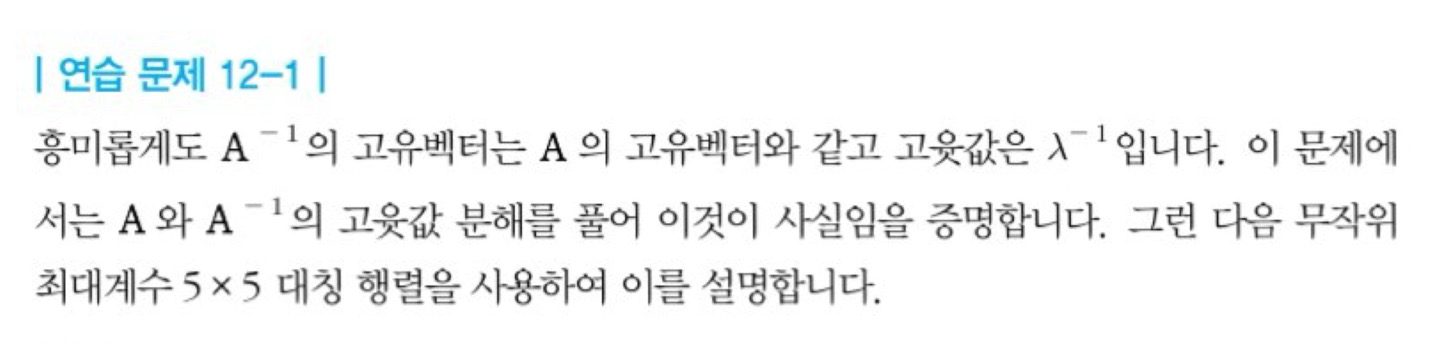

$Av = \lambda v$

$A^{-1}Av=A^{-1}\lambda v$

$v=A^{-1}\lambda v$

$\lambda^{-1}v=A^{-1}v  ⇒  A^{-1}v = \lambda^{-1}v $

> $A^{-1}$의 고유벡터는 $A$의 고유벡터($v$)와 같고 고윳값은 $\lambda^{-1}$이다

* 무작위 최대계수 5x5 대칭 행렬 생성

In [ ]:
A = np.random.randn(5,5)
A = A.T@A
np.linalg.matrix_rank(A)

array([[15.19993363,  1.76685912,  2.73666431, -1.27790396,  2.98972493],
       [ 1.76685912,  9.55440649,  0.61609115,  1.9067736 ,  3.72063028],
       [ 2.73666431,  0.61609115,  1.28109214, -0.72224643,  2.22623045],
       [-1.27790396,  1.9067736 , -0.72224643,  1.14530404, -0.17951936],
       [ 2.98972493,  3.72063028,  2.22623045, -0.17951936,  6.28481026]])

In [ ]:
# A 고윳값 분해
L,V = np.linalg.eig(A)
# inv(A) 고윳값 분해
Linv, Vinv = np.linalg.eig(np.linalg.inv(A))

print('eigen value of A:')
print(np.sort(L))
print('')
print('eigen value of inv(A)')
print(np.sort(Linv))
print('')
print('* compare eigen value of A and inv(A)')
print('1 / eigen value of A:')
print(np.sort(1/L))
print('eigen value of inv(A):')
print(np.sort(Linv))
# np.sort를 왜 해야하지..?

eigen value of A:
[5.73392992e-03 5.70866015e-01 4.31048649e+00 1.06417600e+01
 1.79367001e+01]

eigen value of inv(A)
[5.57516149e-02 9.39694188e-02 2.31992376e-01 1.75172453e+00
 1.74400457e+02]

* compare eigen value of A and inv(A)
1 / eigen value of A:
[5.57516149e-02 9.39694188e-02 2.31992376e-01 1.75172453e+00
 1.74400457e+02]
eigen value of inv(A):
[5.57516149e-02 9.39694188e-02 2.31992376e-01 1.75172453e+00
 1.74400457e+02]


##[Problem 12-2]
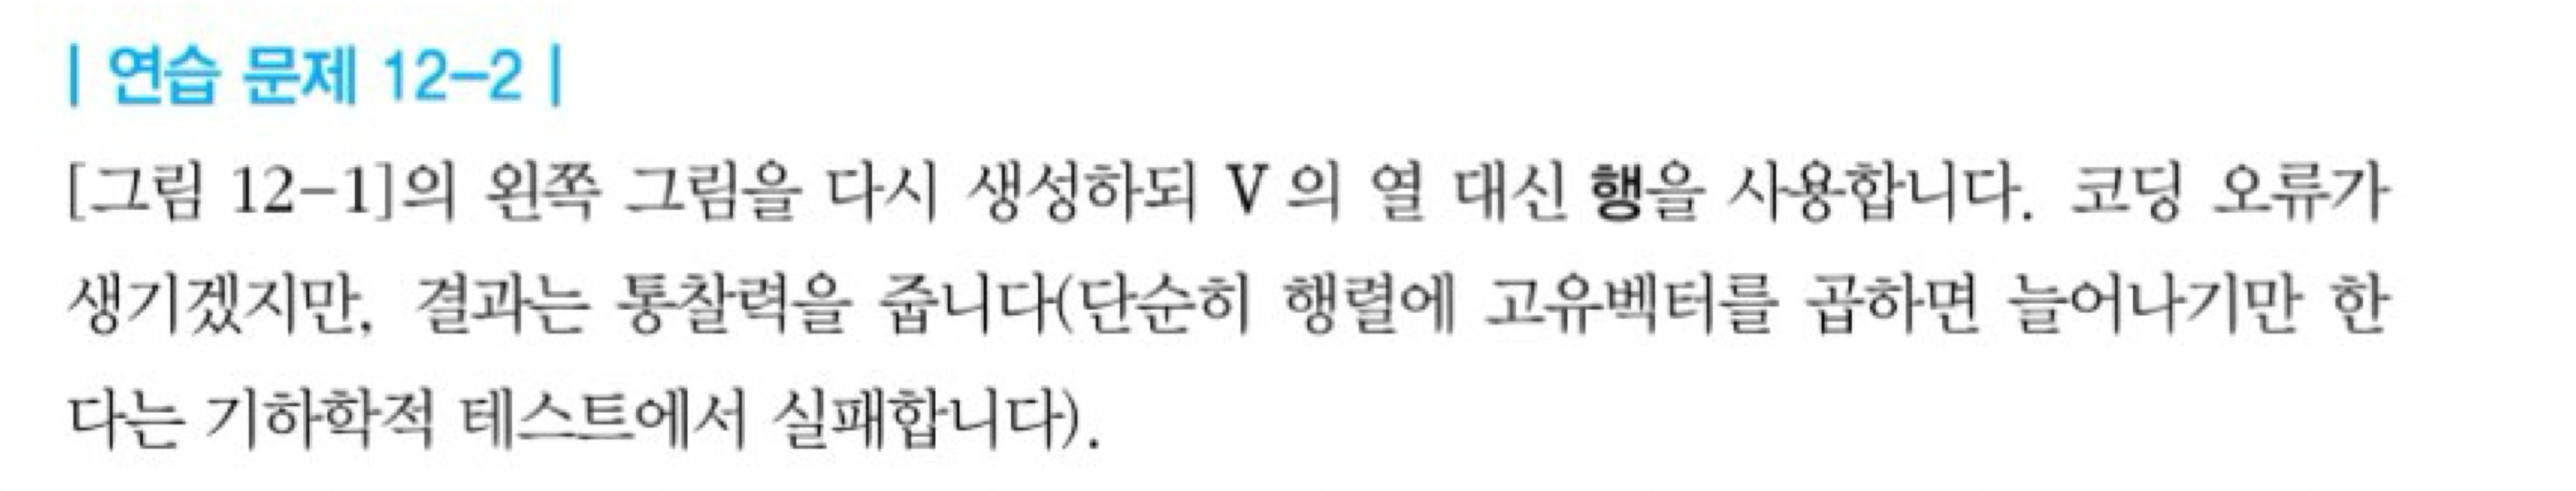

In [ ]:
# the matrix
M = np.array([ [-1,1],
               [-1,2] ])
# 고윳값 분해
L,V = np.linalg.eig(M)
MV = np.dot(M,V)

array([[ 0.57735027, -0.57735027],
       [ 0.22052818, -1.51152263]])

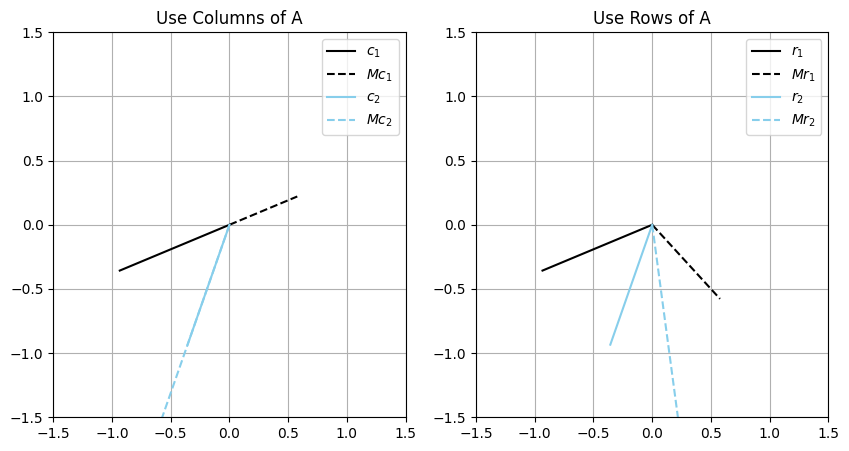

In [ ]:
# 시각화

# V의 열 사용
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot([0, V[0,0]], [0,V[1,0]], color='black', label='$c_1$')
plt.plot([0, MV[0,0]], [0,MV[1,0]], color='black', linestyle='--', label='$Mc_1$')
plt.plot([0, V[0,1]], [0, V[1,1]], color='skyblue', label='$c_2$')
plt.plot([0, MV[0,1]], [0,MV[1,1]], color='skyblue', linestyle='--', label='$Mc_2$')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title('Use Columns of A')
plt.grid()
plt.legend()


# V의 행 사용
plt.subplot(1,2,2)
plt.plot([0, V[0,0]], [0,V[0,1]], color='black', label='$r_1$')
plt.plot([0, MV[0,0]], [0,MV[0,1]], color='black', linestyle='--', label='$Mr_1$')
plt.plot([0, V[1,0]], [0, V[1,1]], color='skyblue', label='$r_2$')
plt.plot([0, MV[1,0]], [0,MV[1,1]], color='skyblue', linestyle='--', label='$Mr_2$')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title('Use Rows of A')
plt.grid()
plt.legend()

## [Problem 12-5]
Shared Problem(지윤)
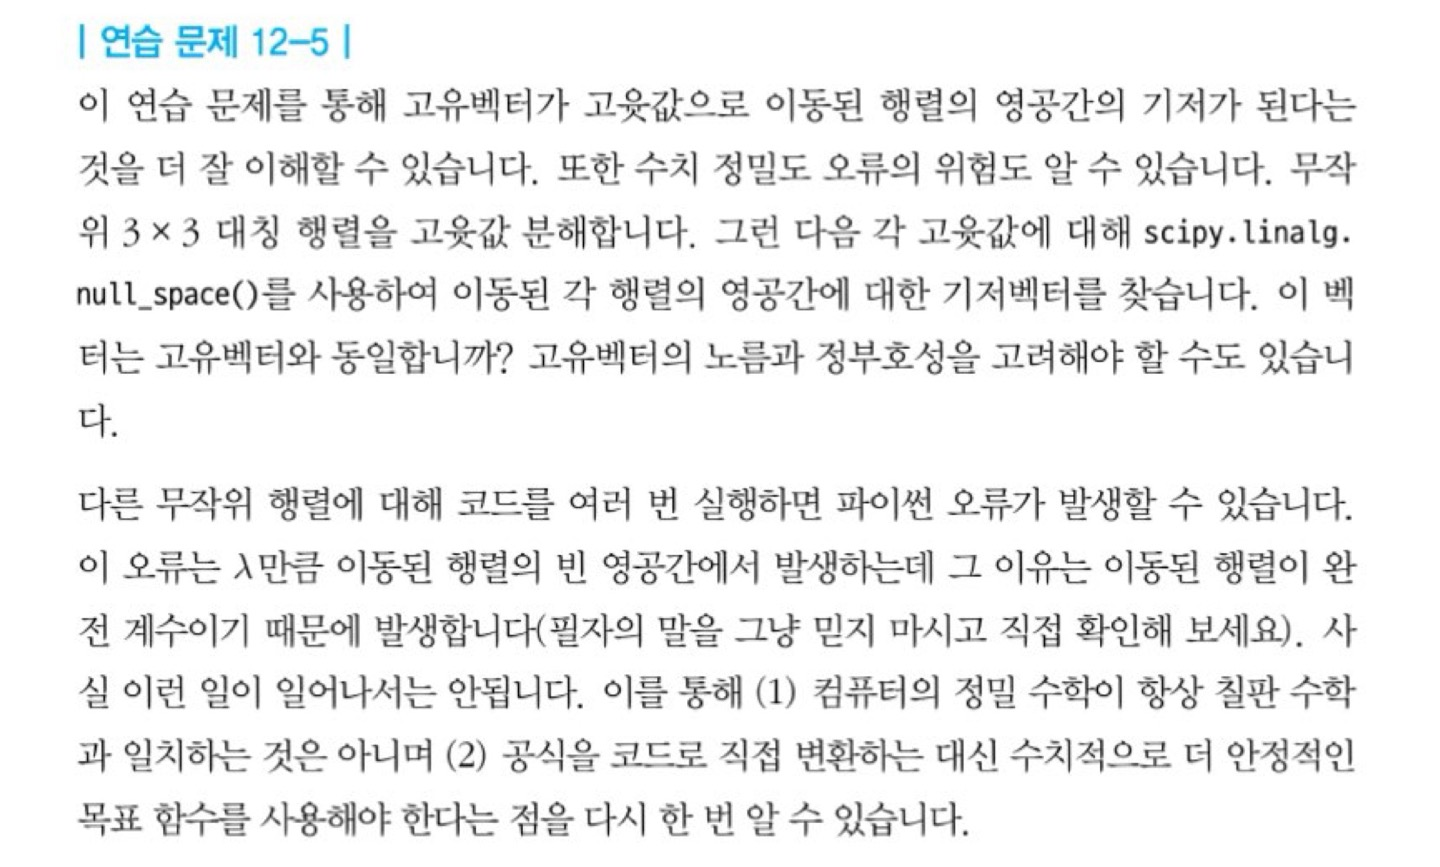

In [ ]:
# 3x3 대칭 행렬 후 EVD
A = np.random.randn(3,3)
A = A.T@A
L,V = np.linalg.eig(A)

for i in range(len(L)):
  null_vector = scipy.linalg.null_space(A-L[i]*np.eye(3))
    # print(np.allclose(V[i], null_vector.T)) False만 나온다
  r = np.corrcoef(null_vector.T,V[[i],:])[0,1]
  print(f'* Correlation between null_space and eigen vector {i}: {np.abs(r):.2f}')
  print('null space vector:', null_vector.T)
  print('eigen vecotr:', V[[i],:])
  print('')
# 상관계수가 1에 가까울 때도 있고 아닐 때도 있음 -> 공식을 코드로 직접 변환하는 것이 수치적으로 불안정한가보다!

* Correlation between null_space and eigen vector 0: 0.99
null space vector: [[-0.84966976  0.50758661 -0.14288855]]
eigen vecotr: [[-0.84966976  0.43557899 -0.2972074 ]]

* Correlation between null_space and eigen vector 1: 0.83
null space vector: [[0.43557899 0.82832265 0.35235284]]
eigen vecotr: [[ 0.50758661  0.82832265 -0.23714431]]

* Correlation between null_space and eigen vector 2: 0.91
null space vector: [[-0.2972074  -0.23714431  0.92489477]]
eigen vecotr: [[-0.14288855  0.35235284  0.92489477]]



In [ ]:
# 정답코드

# get the null_space function from scipy
from scipy.linalg import null_space


# Create a symmetric matrix
N = 3
A = np.random.randn(N,N)
A = A@A.T

# eigendecompose
evals,evecs = np.linalg.eig(A)

# compare the eigenvectors with N(A-lI)
for i in range(N):

  # get the null space vector of the shifted matrix
  nullV = null_space( A-evals[i]*np.eye(N) )

  # check for a match with the eigenvector via correlation (normalizes for magnitudes)
  r = np.corrcoef(nullV.T,evecs[[i],:])[0,1]

  # and print (abs(r))
  print(f'Correlation between N(A-lI) and evec {i}: {np.abs(r):.2f}')

Correlation between N(A-lI) and evec 0: 0.33
Correlation between N(A-lI) and evec 1: 0.52
Correlation between N(A-lI) and evec 2: 0.39


##[Problem 12-10]
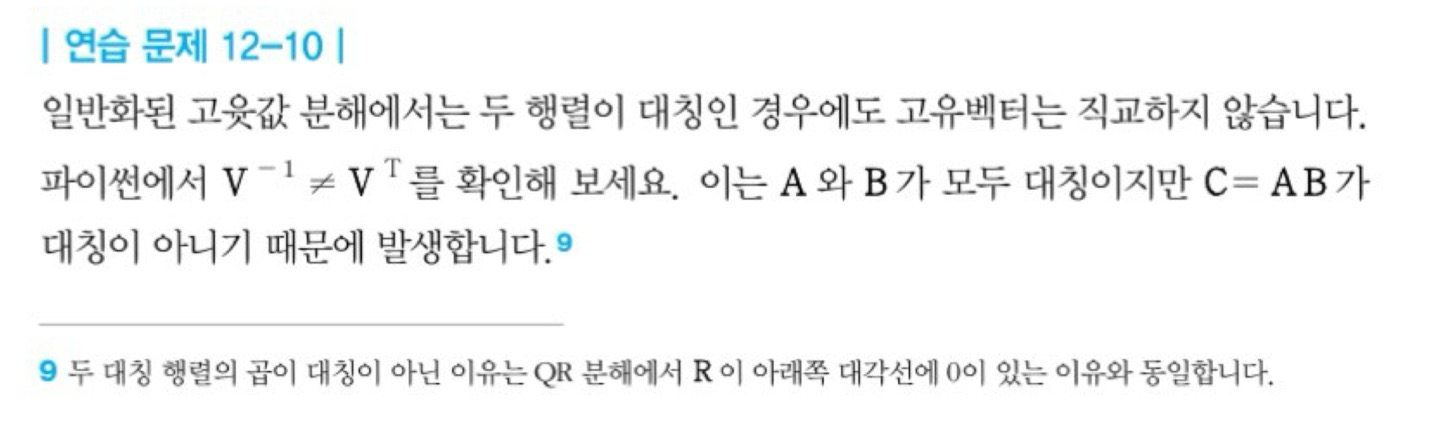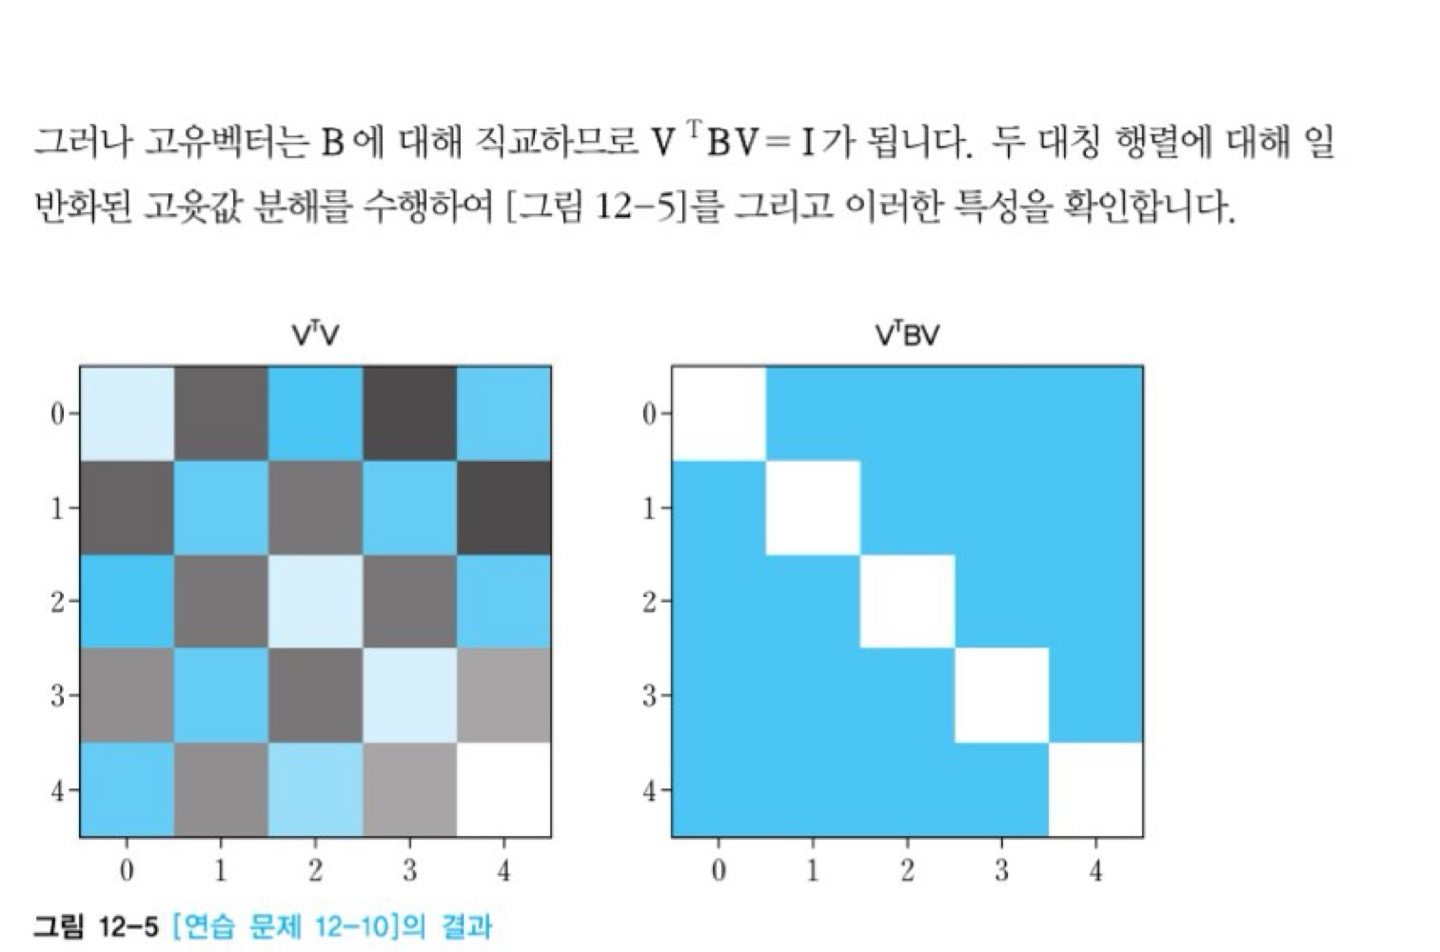

왜 $V^TBV=I$ 지............


In [ ]:
A = np.random.randn(5,5)
A = A.T@A

B = np.random.randn(5,5)
B = B.T@B

L,V = eigh(A,B)

In [ ]:
np.allclose(np.linalg.inv(V), V.T)

False

True

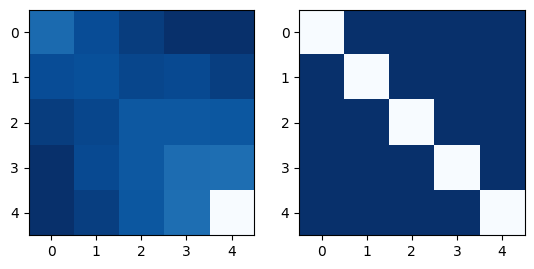

In [ ]:
plt.subplot(1,2,1)
plt.imshow(V.T@V, cmap='Blues_r')

plt.subplot(1,2,2)
plt.imshow(V.T@B@V, cmap='Blues_r')